In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline


In [2]:
#DATA preprocessing
#Load dataset
x_data = pd.read_csv(r'C:\Users\chongs\BDANALYSIS\furnace_bd.csv')
x_data = x_data.iloc[:,2:]
#epoch time 수정
x_data['3'] = x_data['3'].astype(str).str[:-3].astype(np.int64)

In [3]:
#구간 선택
x_data = x_data[x_data['3'].values > 1536890472]
x_data = x_data[x_data['3'].values < 1536900762]

In [4]:
#pivot table 사용 query 진행
x_data = x_data.pivot_table(index = x_data['3'],columns = x_data['1'])
#dataframe 재설정
x_data = x_data['2'][['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16', 'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8', 'temp_zone7_top', 'temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31', 'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37', 'temp_zone8_top']]
x_data = x_data.interpolate()

In [5]:
y_data = pd.read_csv(r"C:\Users\chongs\BDANALYSIS\14_Gls_org.csv", engine = 'python', index_col = False)
#원하는 columns 선택

y_data['time'] = y_data['날짜'] + ' ' + y_data['시간']

#시간 delay 수정 및 epoch 시간으로 convert
total_delay = dt.timedelta(minutes = 8, seconds=5)

y_data['time']=(pd.to_datetime(y_data['time']) - total_delay).apply(dt.datetime.timestamp).astype(np.int64)

y_data = y_data[['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

y_data.set_index('time', inplace = True)


In [6]:
# X, Y data의 index를 y_data의 인덱스에 맞춰 Join 실행(NaN 값 : drop)
xy = pd.concat([x_data, y_data], axis=1, join='inner', join_axes = [x_data.index] )
xy.dropna(inplace=True)

In [30]:
#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

In [61]:
# def featurenormalization(X):
#     X_norm = X

#     mu = np.zeros((1, np.size(X,axis = 1)))
#     sigma = np.zeros((1, np.size(X,axis = 1)))

#     mu = np.mean(X,axis = 0)
#     sigma = np.std(X,axis = 0)

#     X_norm = (X_norm - mu)/sigma
    
#     return X_norm, mu, sigma

In [34]:
# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

In [35]:
# MultiOutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 175, random_state = 100))
mor.fit(X_train, y_train)

#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y_train_pred_mor = mor.predict(X_train)
y_test_pred_mor = mor.predict(X_test)

r2_train_mor = r2_score(y_train, y_train_pred_mor)
r2_test_mor = r2_score(y_test, y_test_pred_mor)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_mor, r2_test_mor))

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_mor))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_mor))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_mor)))  

R2 - Train : 0.969, Test: 0.844
Mean Absolute Error: 0.0727622839704555
Mean Squared Error: 0.009388261763411652
Root Mean Squared Error: 0.09689304290511085


In [36]:
# #sk learn 랜덤포레스트 리그레션 피팅
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 175, random_state = 100)
# regressor.fit(X_train,y_train)

# #결정계수 r2 score 계싼
# from sklearn.metrics import r2_score
# y_train_pred = regressor.predict(X_train)
# y_test_pred = regressor.predict(X_test)

# r2_train = r2_score(y_train, y_train_pred)
# r2_test = r2_score(y_test, y_test_pred)

# print('R2 - Train : %.3f, Test: %.3f' %(r2_train, r2_test))

# from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

In [13]:
# X_grid = np.arange(min(X_train['temp_zone8_31']), max(X_train['temp_zone8_31']), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X_train['temp_zone8_31'], y_train['E'], color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('RandomForestRegression_Sample')
# plt.xlabel('temp_zone8_31')
# plt.ylabel('E')
# plt.show()

In [40]:
#sk learn 랜덤포레스트 리그레션 피팅
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

result_r2 = []
for i in X_train.columns:
    X_sample_train = X_train[i].values.reshape(-1,1)
    X_sample_test = X_test[i].values.reshape(-1,1)
  
    for j in y_train.columns:
        y_sample_train = y_train[j].values.reshape(-1,1)
        y_sample_test = y_test[j].values.reshape(-1,1)

        regressor = RandomForestRegressor(n_estimators = 175, random_state = 100)
        regressor.fit(X_sample_train,y_sample_train)

        #결정계수 r2 score 계산
        
        y_train_pred = regressor.predict(X_sample_train)
        y_test_pred = regressor.predict(X_sample_test)
        
        r2_train = r2_score(y_sample_train, y_train_pred)
        r2_test = r2_score(y_sample_test, y_test_pred)
        
        print('R2 - Train : %.3f, Test: %.3f' %(r2_train, r2_test))

        result_r2.append((i,j,r2_train,r2_test))
#         print('Mean Absolute Error:', metrics.mean_absolute_error(y_sample_test, y_test_pred))  
#         print('Mean Squared Error:', metrics.mean_squared_error(y_sample_test, y_test_pred))  
#         print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_sample_test, y_test_pred))) 

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.435, Test: 0.456


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.114, Test: -0.011


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.382, Test: 0.287


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.416, Test: 0.410


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.368, Test: 0.409


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.385, Test: 0.397


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.312, Test: 0.372


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.342, Test: 0.360


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.364, Test: 0.385


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.315, Test: 0.268


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.345, Test: 0.358


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.316, Test: 0.336


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.241, Test: 0.109


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.350, Test: 0.328


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.294, Test: 0.191


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.471, Test: 0.472


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.134, Test: 0.002


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.408, Test: 0.298


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.458, Test: 0.419


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.403, Test: 0.414


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.420, Test: 0.397


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.343, Test: 0.383


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.382, Test: 0.370


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.393, Test: 0.388


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.354, Test: 0.272


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.382, Test: 0.363


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.349, Test: 0.346


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.278, Test: 0.140


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.391, Test: 0.331


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.334, Test: 0.217


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.348, Test: 0.433


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.056, Test: 0.001


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.272, Test: 0.279


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.312, Test: 0.367


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.266, Test: 0.344


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.282, Test: 0.351


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.229, Test: 0.289


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.237, Test: 0.304


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.270, Test: 0.332


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.207, Test: 0.218


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.247, Test: 0.309


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.199, Test: 0.268


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.142, Test: 0.058


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.234, Test: 0.283


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.224, Test: 0.145


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.386, Test: 0.438


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.055, Test: -0.011


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.302, Test: 0.304


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.352, Test: 0.389


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.297, Test: 0.349


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.320, Test: 0.366


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.274, Test: 0.308


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.271, Test: 0.311


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.314, Test: 0.341


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.230, Test: 0.230


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.280, Test: 0.311


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.222, Test: 0.266


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.147, Test: 0.059


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.267, Test: 0.291


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.237, Test: 0.139


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.354, Test: 0.454


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.061, Test: -0.009


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.291, Test: 0.324


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.327, Test: 0.405


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.272, Test: 0.371


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.291, Test: 0.380


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.240, Test: 0.327


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.243, Test: 0.335


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.275, Test: 0.352


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.216, Test: 0.260


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.251, Test: 0.338


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.199, Test: 0.292


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.133, Test: 0.076


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.241, Test: 0.316


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.223, Test: 0.154


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.384, Test: 0.434


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.079, Test: 0.003


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.310, Test: 0.299


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.364, Test: 0.402


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.313, Test: 0.351


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.329, Test: 0.364


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.278, Test: 0.289


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.282, Test: 0.317


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.310, Test: 0.333


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.250, Test: 0.230


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.288, Test: 0.318


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.246, Test: 0.270


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.176, Test: 0.044


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.286, Test: 0.310


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.253, Test: 0.147


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.793, Test: 0.656


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.296, Test: 0.094


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.723, Test: 0.530


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.745, Test: 0.604


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.789, Test: 0.630


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.768, Test: 0.616


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.757, Test: 0.566


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.776, Test: 0.616


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.792, Test: 0.628


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.794, Test: 0.584


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.789, Test: 0.618


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.782, Test: 0.598


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.740, Test: 0.458


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.756, Test: 0.564


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.703, Test: 0.502


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.760, Test: 0.698


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.299, Test: 0.088


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.704, Test: 0.534


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.703, Test: 0.649


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.755, Test: 0.677


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.726, Test: 0.666


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.731, Test: 0.612


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.730, Test: 0.660


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.747, Test: 0.675


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.739, Test: 0.598


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.738, Test: 0.659


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.733, Test: 0.632


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.695, Test: 0.462


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.710, Test: 0.602


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.682, Test: 0.524


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.756, Test: 0.671


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.339, Test: 0.212


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.697, Test: 0.536


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.711, Test: 0.608


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.742, Test: 0.645


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.724, Test: 0.626


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.739, Test: 0.648


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.722, Test: 0.611


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.747, Test: 0.639


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.741, Test: 0.630


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.730, Test: 0.612


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.712, Test: 0.594


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.733, Test: 0.645


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.700, Test: 0.567


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.719, Test: 0.556


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.828, Test: 0.805


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.375, Test: 0.184


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.768, Test: 0.714


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.787, Test: 0.743


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.849, Test: 0.819


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.825, Test: 0.794


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.809, Test: 0.790


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.838, Test: 0.807


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.847, Test: 0.831


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.859, Test: 0.819


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.847, Test: 0.810


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.829, Test: 0.783


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.862, Test: 0.824


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.801, Test: 0.735


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.810, Test: 0.733


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.630, Test: 0.585


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.237, Test: 0.055


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.541, Test: 0.407


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.611, Test: 0.549


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.613, Test: 0.549


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.621, Test: 0.552


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.583, Test: 0.502


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.615, Test: 0.540


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.636, Test: 0.558


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.573, Test: 0.452


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.621, Test: 0.553


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.603, Test: 0.543


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.502, Test: 0.335


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.613, Test: 0.534


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.568, Test: 0.402


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.758, Test: 0.666


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.263, Test: 0.047


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.673, Test: 0.500


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.708, Test: 0.617


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.745, Test: 0.650


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.722, Test: 0.625


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.723, Test: 0.607


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.722, Test: 0.624


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.740, Test: 0.647


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.728, Test: 0.577


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.732, Test: 0.637


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.723, Test: 0.624


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.662, Test: 0.419


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.705, Test: 0.597


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.645, Test: 0.462


In [41]:
result_r2 = pd.DataFrame(result_r2)

In [42]:
result_r2

,0,1,2,3
0,temp_zone7_10,A,0.435088,0.455651
1,temp_zone7_10,B,0.114364,-0.010770
2,temp_zone7_10,C,0.381585,0.286653
3,temp_zone7_10,D,0.416290,0.409912
4,temp_zone7_10,E,0.367870,0.409403
5,temp_zone7_10,F,0.384614,0.396699
6,temp_zone7_10,G,0.311949,0.372232
7,temp_zone7_10,H,0.342454,0.360475
8,temp_zone7_10,I,0.363757,0.384823
9,temp_zone7_10,J,0.314584,0.268492


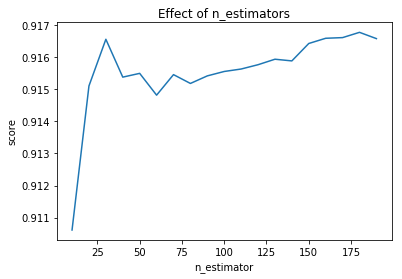

In [168]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regressor.set_params(n_estimators = n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [122]:
a

[1]

In [160]:
# x_new = [[720.0, 720.0, 721.0, 720.0, 720.0, 720.0,728.0,728.0, 726.0,725.0,726.0,728.0],
#         [720.0, 720.0, 720.0, 720.0, 720.0, 720.0,730.0,730.0, 725.0,725.0,730.0,730.0],
#         [720.0, 720.0, 720.0, 720.0, 720.0, 720.0,728.0,728.0, 728.0,728.0,728.0,728.0]]

In [29]:
y_train

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
3,,,,,,,,,,,,,,,
1536896620,1.39,0.55,1.67,1.32,2.35,1.89,1.06,2.09,0.86,1.78,1.81,1.85,1.08,1.27,0.79
1536898823,1.22,0.50,1.52,1.26,2.02,1.70,0.80,1.92,0.90,1.72,1.68,1.40,1.01,1.12,0.72
1536897834,1.31,0.50,1.55,1.20,2.16,1.68,1.14,1.85,0.91,1.74,1.67,1.59,1.00,1.12,0.70
1536896407,0.92,0.58,1.41,0.97,1.48,1.24,0.63,1.25,0.66,1.43,1.19,1.20,1.06,0.84,0.80
1536892352,0.75,0.48,1.20,0.93,1.39,1.20,0.47,1.29,0.48,1.23,1.02,1.06,1.03,0.74,0.71
1536891452,0.46,0.55,0.85,0.60,1.02,0.78,0.39,0.80,0.29,0.94,0.63,0.89,0.87,0.48,0.62
1536890590,0.78,0.52,1.19,0.80,1.06,1.06,0.06,1.23,0.34,1.15,1.03,1.16,1.03,0.68,0.79
1536892253,0.88,0.52,1.39,1.10,1.64,1.41,0.65,1.54,0.65,1.55,1.29,1.30,1.00,0.98,0.78
1536891414,0.54,0.42,0.99,0.71,1.14,0.94,0.46,0.89,0.40,1.04,0.74,0.96,0.98,0.56,0.62


In [43]:
#MSE를 통한 최적조건
result = []
for i in range(272):
    for j in range(15):
        mean = np.mean(y_test_pred_mor[i])
        sqrerr = np.asarray(mean - y_test_pred_mor[i][j])**2
        cost = (1/2)*np.sum(sqrerr)
        result = np.append(result, cost)

np.where(result == np.min(result))
print(result[31])
print(X_test.iloc[31,:])

3.568265306121345e-06
temp_zone7_10    720.0
temp_zone7_12    720.0
temp_zone7_14    721.0
temp_zone7_16    720.0
temp_zone7_6     720.0
temp_zone7_8     720.0
temp_zone8_25    728.0
temp_zone8_27    728.0
temp_zone8_29    726.0
temp_zone8_31    725.0
temp_zone8_33    726.0
temp_zone8_35    728.0
Name: 1536896269, dtype: float64


In [44]:
#Mean를 통한 최적조건
result2 = []
for i in range(272):
    mean = np.mean(y_test_pred_mor[i])
    
    result2 = np.append(result2, mean)

np.where(result2 == np.min(result2))
print(result[2])
print(X_test.iloc[2,:])

0.017728384368305018
temp_zone7_10    725.000000
temp_zone7_12    725.000000
temp_zone7_14    725.000000
temp_zone7_16    725.000000
temp_zone7_6     725.666667
temp_zone7_8     725.000000
temp_zone8_25    735.000000
temp_zone8_27    736.000000
temp_zone8_29    731.000000
temp_zone8_31    735.000000
temp_zone8_33    737.000000
temp_zone8_35    735.000000
Name: 1536900124, dtype: float64


In [46]:
#Max를 통한 최적조건
result3 = []
for i in range(272):
    pred_max = np.max(np.abs(y_test_pred_mor[i]))
    
    result3 = np.append(result3, pred_max)

print(np.where(result3 == np.min(result3)))
print(result3[21])
print(X_test.iloc[21,:])

(array([194], dtype=int64),)
0.5721714285714294
temp_zone7_10    725.0
temp_zone7_12    725.0
temp_zone7_14    725.0
temp_zone7_16    725.0
temp_zone7_6     725.0
temp_zone7_8     725.0
temp_zone8_25    735.0
temp_zone8_27    735.0
temp_zone8_29    735.0
temp_zone8_31    736.0
temp_zone8_33    736.0
temp_zone8_35    735.0
Name: 1536900362, dtype: float64


In [47]:
# #Random Forestclassifier https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

# #x,y값 재추출
# x_cf = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
#        'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
#        'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37']]
# y_cf = xy[['E']]

# # Train / Test set 나누기
# from sklearn.cross_validation import train_test_split
# X_cf_train, X_cf_test, y_cf_train, y_cf_test = train_test_split(x_cf, y_cf, test_size=0.33, random_state=100)

# from sklearn.ensemble import RandomForestClassifier

# rfc=RandomForestClassifier(n_estimators=600)

# rfc.fit(X_cf_train,y_cf_train)
# rfc_pred = rfc.predict(X_cf_test)
# from  sklearn.metrics import classification_report,confusion_matrix
# prediction = regressor.predict(X_cf_test)
# classification_report(y_cf_test,prediction)

In [48]:
# y_test와 y_test_pred(예측값) 비교
error = y_test - y_test_pred
summary = error.describe()

ValueError: Unable to coerce to Series, length must be 15: given 272

In [135]:
summary

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,-0.006509,0.000207,-0.001607,-0.005771,-0.013052,-0.008457,-0.003445,-0.015501,-0.003139,-0.003798,-0.009862,0.000104,-0.011266,0.001364,0.000765
std,0.073527,0.064622,0.106310,0.064828,0.127394,0.115169,0.110554,0.128363,0.066326,0.097041,0.101099,0.084405,0.061911,0.070617,0.060963
min,-0.332125,-0.193667,-0.298650,-0.238517,-0.385822,-0.326861,-0.343583,-0.479824,-0.188768,-0.282200,-0.315201,-0.257893,-0.233478,-0.276100,-0.171325
25%,-0.049730,-0.044851,-0.065919,-0.046397,-0.097353,-0.087459,-0.074926,-0.094888,-0.042094,-0.065598,-0.067485,-0.053554,-0.045678,-0.044932,-0.040895
50%,-0.005477,0.011337,-0.004377,-0.005281,-0.022706,-0.019224,0.003465,-0.024247,-0.004267,-0.003167,-0.008215,0.005512,-0.007716,0.002422,0.006590
75%,0.042230,0.050227,0.063307,0.032611,0.052556,0.056190,0.066957,0.052894,0.038096,0.055378,0.048687,0.050888,0.023175,0.037391,0.044271
max,0.226450,0.168617,0.332717,0.189933,0.493183,0.339583,0.343271,0.422167,0.209301,0.382217,0.326250,0.268783,0.180295,0.238217,0.138474


In [136]:
#error의 평균 및 std값 visualization
#Plotly PLot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

x = summary.columns
y = summary.iloc[1,:]

c = summary.iloc[2,:]
# s = xy['E']  + 2 
data=[
    go.Scatter(x=x,y=y,
                mode = 'markers',
                marker = dict(
                size = 10,
                color= c,
                showscale=True
                ),
                )
]
layout=go.Layout()
figure=go.Figure(data=data,layout=layout)
py.iplot(figure)

In [137]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:

# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y__trainlinear_pred = lin_reg.predict(X_train)
y_linear_pred = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y__trainlinear_pred)
r2_test = r2_score(y_test, y_linear_pred)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train, r2_test))

R2 - Train : 0.284, Test: 0.159
